In [1]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seed
RANDOM_STATE = 1776
notebook = 'PyTorch'

# import user functions
import PyTorchUserFunctions as uf
import Visualization as vi

# set seaborn theme
sns.set_theme()

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler, TensorDataset
import torch.nn.functional as F
import torch.optim as optim
from sklearn import metrics
from sklearn.model_selection import train_test_split

# import MinMax Scaler library
from sklearn.preprocessing import MinMaxScaler

# print versions
print("PyTorch Version: " + torch.__version__)
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

PyTorch Version: 2.5.1
Numpy Version: 2.1.3
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.11.10


In [2]:
# data file
df = pd.read_pickle("../Data/Version1_Consolidated.pkl")

# remove columns
df_remove = pd.read_pickle("../Data/Version1_Consolidated_colRemove.pkl")

# data label
df_label = pd.read_pickle("../Data/Version1_Consolidated_colLabel.pkl")

# don columns
df_don = pd.read_pickle("../Data/Version1_Consolidated_DONColumn.pkl")

# can columns
df_can = pd.read_pickle("../Data/Version1_Consolidated_CANColumn.pkl")

# both columns
df_both = pd.read_pickle("../Data/Version1_Consolidated_BothColumn.pkl")

# nominal columns
df_nominal = pd.read_pickle("../Data/Version1_Consolidated_NominalColumn.pkl")

# ordinal columns
df_ordinal = pd.read_pickle("../Data/Version1_Consolidated_OrdinalColumn.pkl")

# data dictionary
df_dict = pd.read_pickle("../Data/Version1_Consolidated_FinalcolumnDefinition.pkl")

# import flat file
df_flat = pd.read_csv("../Data/flatfile.csv")

# checking for duplicated column name
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [3]:
# get remove Features
removeCol = df_remove.remove.to_list()

# house keeping
df, df_dict, df_remove, df_label, df_can, df_don, df_both, df_ordinal,  df_nominal = uf.HouseKeeping(df, removeCol, df_dict, df_remove, \
                                                                                                     df_label, df_can, df_don, df_both,\
                                                                                                     df_ordinal,  df_nominal, notebook)

Data Dictionary Updated.
Remove row(s) from df_remove DataFrame.
Remove row(s) from df_label DataFrame.
Remove row(s) from df_can DataFrame.
Remove row(s) from df_don DataFrame.
Remove row(s) from df_both DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.

Removed Features:['Age_CAN', 'Age_DON', 'Age_Listing_CAN', 'AllocationType', 'AntigenBW4_CAN', 'AntigenBW6_CAN', 'AntigenC1_CAN', 'AntigenC2_CAN', 'AntigenDQ1_CAN', 'AntigenDQ2_CAN', 'AntigenDR51_2_CAN', 'AntigenDR51_CAN', 'AntigenDR52_2_CAN', 'AntigenDR52_CAN', 'AntigenDR53_2_CAN', 'AntigenDR53_CAN', 'BMI_CAN', 'BMI_DON', 'BloodGroup_CAN', 'BloodGroup_DON', 'BronchoscopyLeft_DON', 'BronchoscopyRight_DON', 'CPRA_Peak', 'CPRA_Recent', 'CancerExtraCranial_DON', 'CancerHistory_DON', 'CancerIntraCranial_DON', 'CancerSite_DON', 'CancerSkin_DON', 'Citizenship_CAN', 'Citizenship_DON', 'CocaineUse_DON', 'CreatinineListing_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'DiagnosisAtListing_CAN', '

In [4]:
df_label

,label
0,FunctionalStatusFollowUp
1,DialysisPriorDischarge
2,AirwayDehiscencePostTransplant
3,AcuteRejectionEpisode
4,StrokePostTransplant
5,PacemakerPostTransplant
6,GraftFailed
7,GraftLifeSpanDay
8,LastFollowupNumber
9,TransplantStatus


In [5]:
# remove labels
removeCol = df_label.label[(~df_label.label.isin(['GraftStatus']))].to_list()

# house keeping
df, df_dict, df_remove, df_label, df_can, df_don, df_both, df_ordinal,  df_nominal = uf.HouseKeeping(df, removeCol, df_dict, df_remove, \
                                                                                                     df_label, df_can, df_don, df_both,\
                                                                                                     df_ordinal,  df_nominal, notebook)

Data Dictionary Updated.
Remove row(s) from df_remove DataFrame.
Remove row(s) from df_label DataFrame.
Remove row(s) from df_can DataFrame.
Remove row(s) from df_don DataFrame.
Remove row(s) from df_both DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.

Removed Features:['AcuteRejection', 'AcuteRejectionEpisode', 'AirwayDehiscencePostTransplant', 'DialysisPriorDischarge', 'FunctionalStatusFollowUp', 'FunctionalStatusFollowUp_Combined', 'GraftFailed', 'GraftLifeSpanDay', 'LastFollowupNumber', 'LengthOfStay', 'PacemakerPostTransplant', 'RecipientStatus', 'RejectionTreatmentWithinOneYear', 'StrokePostTransplant', 'TransplantStatus', 'TransplantSurvivalDay']

Total rows before: 15,284 & columns: 155
Total rows after: 15,284 & columns: 139


In [6]:
# initialize list with feature names
uf.datatypeDF(df)

Total Data feature count:  139

Boolean feature count: 0
Category feature count: 99
Numeric feature count: 40
Object feature count: 0
Other feature count: 0

Total feature count:  139


In [7]:
# display NaNs
DFNaN = uf.percentageNull(df)

# remove ove 40% NaNs
removeCol = DFNaN[DFNaN.percentage >= 40].index

# display
DFNaN.head()

,percentage,NaNCount
TotalSerumAlbumin_CAN,97.853965,14956
AntigenHLAcompatibility_A1,7.105470,1086
AntigenHLAcompatibility_B1,7.105470,1086
AntigenHLAcompatibility_B2,7.105470,1086
AntigenHLAcompatibility_DR1,7.105470,1086


In [8]:
# house keeping
df, df_dict, df_remove, df_label, df_can, df_don, df_both, df_ordinal,  df_nominal = uf.HouseKeeping(df, removeCol, df_dict, df_remove, \
                                                                                                     df_label, df_can, df_don, df_both,\
                                                                                                     df_ordinal,  df_nominal, notebook)

Data Dictionary Updated.
Remove row(s) from df_remove DataFrame.
Remove row(s) from df_label DataFrame.
Remove row(s) from df_can DataFrame.
Remove row(s) from df_don DataFrame.
Remove row(s) from df_both DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.

Removed Features:['TotalSerumAlbumin_CAN']

Total rows before: 15,284 & columns: 139
Total rows after: 15,284 & columns: 138


In [9]:
# remove all NaNs
df = df.dropna()

# shape
df.shape

(13541, 138)

In [10]:
# display value counts
df.GraftStatus.value_counts(dropna=False)

GraftStatus
Y    12849
N      472
U      220
Name: count, dtype: int64

In [11]:
# filter DataFrame
df = df[df['GraftStatus'] != 'U']

In [12]:
# display value counts
df.GraftStatus.value_counts(dropna=False)

GraftStatus
Y    12849
N      472
U        0
Name: count, dtype: int64

In [13]:
# remove Zero category from dataframe
df = uf.removeCatZeroCount(df).copy()

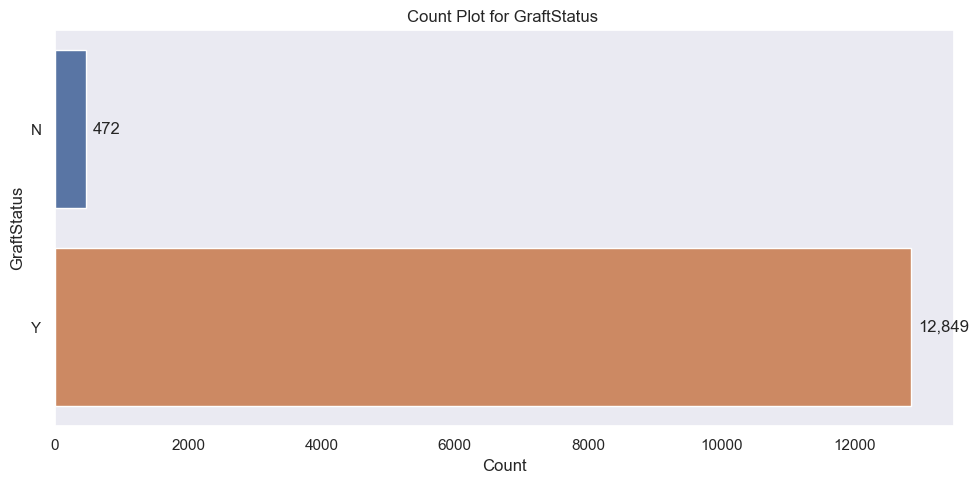

In [14]:
# plot
vi.countPlot(df, ['GraftStatus'])

In [15]:
# dind binary categorical features
binaryCol= [col for col in df.columns if df[col].nunique() == 2]

# get nominal features
nominalCat = df_nominal.nominal.to_list()
# get ordinal features
ordinalCat = df_ordinal.ordinal.to_list()

# display
print(f"Ordinal: {len(ordinalCat)}")
print(f"Nominal: {len(nominalCat)}")
print(f"Binary Length: {len(binaryCol)}")

Ordinal: 32
Nominal: 89
Binary Length: 20


In [16]:
# mapp binary features
mapping = {'N': 1, 'Y':0, 'Yes': 1, 'No': 0, 'Non-Hispanic/Non-Latino': 0, 'Hispanic/Latino': 1, 'Negative': 0, 'Not Done': 1, 'True': 0, 'False': 1}

# convert to string
df[binaryCol] = df[binaryCol].astype(str)

# mapping
for col in binaryCol:
    df[col] = df[col].map(mapping).fillna(df[col])

# change dataype to integer
df[binaryCol] = df[binaryCol].astype(int)

# display
df[binaryCol].head()

,PreviousMalignancy_CAN,CigaretteUse_CAN,Hispanic_CAN,LifeSupportTransplant_ECMO_CAN,LifeSupportTransplant_PGE_CAN,LifeSupportTransplant_IABP_CAN,LifeSupportTransplant_OTHER_CAN,VentilatorTransplant_CAN,LifeSupportInhaledTransplant_CAN,NonHeartBeating_DON,BloodInfectionSource_DON,PulmonaryInfection_DON,UrineInfection_DON,HIV_NAT_Result_DON,GraftStatus,KidneyAllocation_DON,PulmCath_DON,Ethnicity_Difference,Gender_Difference,IntropesIV_Combined_CAN
2,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1
4,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0
5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
6,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1


In [17]:
# for encoding
numericValue, nonNumericValue = uf.catNumeric(df, nominalCat)

# add non-binary category to non-numeric category
nonNumericValue.extend(list(set(numericValue) - set(binaryCol)))

# display
print(sorted(nonNumericValue))

['AntibodyResultHBSAB_DON', 'Antibody_HEP_C_DON', 'Antihypertensive_DON', 'ArginnieManagement_DON', 'Biopsy_DON', 'Bronchoscopy_Combined_DON', 'CMVStatusTransplant_CAN', 'Cancer_DON', 'CardiacArrest_DON', 'CauseOfDeath_DON', 'CerebroVascularDisease_CAN', 'ChestXray_DON', 'CigaretteHistory_DON', 'ClinicalInfection_DON', 'CocaineUse_Combined_DON', 'CoronaryAngiogram_DON', 'CrossMatch', 'DeathCircumstance_DON', 'DeathMechanism_DON', 'DeceasedRetyped_DON', 'DefibrillatorImplant_CAN', 'Diabetes_CAN', 'Diabetes_DON', 'DialysisListingTransplant_CAN', 'Diuretics_DON', 'EpsteinBarrSeroStatusTransplant_CAN', 'EpsteinBarr_IGG_DON', 'EpsteinBarr_IGM_DON', 'HBV_NAT_Result_CAN', 'HBV_NAT_Result_DON', 'HCV_NAT_PreTranspant_CAN', 'HCV_NAT_Result_DON', 'HEP_C_SerostatusStatus_CAN', 'HIV_NAT_PreTransplant_CAN', 'HIV_SeroStatusTransplant_CAN', 'HeartProcedureType_CAN', 'HeavyAlcoholUse_DON', 'HeparinManagement_DON', 'Hepatitis_B_CoreAntibody_CAN', 'Hepatitis_B_CoreAntibody_DON', 'Hypertension_DON', 'Infe

#### Encode - Ordinal

In [18]:
# import libraries
from sklearn.preprocessing import OrdinalEncoder

# get ordinal
ordinalCol = df_ordinal.ordinal.to_list()

# for encoding
numericOrdinal, nonNumericOrdinal = uf.catNumeric(df, ordinalCol)

In [19]:
# BloodGroupMatchLevel
ordering = ['Identical', 'Compatible', 'Incompatible']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['BloodGroupMatchLevel'] = encoder.fit_transform(df[['BloodGroupMatchLevel']])

In [20]:
# EducationLevel_CAN
ordering = ['UNKNOWN', 'NONE', 'GRADE SCHOOL (0-8)','HIGH SCHOOL (9-12) or GED','ATTENDED COLLEGE/TECHNICAL SCHOOL','ASSOCIATE/BACHELOR DEGREE','POST-COLLEGE GRADUATE DEGREE']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['EducationLevel_CAN'] = encoder.fit_transform(df[['EducationLevel_CAN']])

In [21]:
# DiabetesType_CAN
ordering = ['Unknown', 'No', 'Type Unknown', 'Type Other', 'Type II','Type I']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['DiabetesType_CAN'] = encoder.fit_transform(df[['DiabetesType_CAN']])

In [22]:
# DiabetesHistory_DON
ordering = ['Unknown', 'No', 'Yes, Duration Unknown','Yes, 0-5 years','Yes, 6-10 years','Yes, >10 years']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['DiabetesHistory_DON'] = encoder.fit_transform(df[['DiabetesHistory_DON']])

In [23]:
# CigaretteAbstinence_CAN
ordering = ['Unknown', 'Unknown duration', '0-2 months', '3-12 months','13-24 months', '25-36 months', '37-48 months', '49-60 months', '>60 months', 'Continues to smoke']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['CigaretteAbstinence_CAN'] = encoder.fit_transform(df[['CigaretteAbstinence_CAN']])

In [24]:
# MedicalConditionTransplant_CAN
ordering = ['Unknown', 'Not Hospitalized', 'Hospitalized Not in ICU', 'In Intensive Care Unit']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['MedicalConditionTransplant_CAN'] = encoder.fit_transform(df[['MedicalConditionTransplant_CAN']])

In [25]:
# MismatchLevel_LOCUS
ordering = ['Unknown', 'Low Mismatch', 'High Mismatch']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['MismatchLevel_LOCUS'] = encoder.fit_transform(df[['MismatchLevel_LOCUS']])

In [26]:
# MismatchLevel_HLA
ordering = ['Unknown', 'No Mismatch', 'Low Mismatch', 'Moderate Mismatch', 'High Mismatch']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['MismatchLevel_HLA'] = encoder.fit_transform(df[['MismatchLevel_HLA']])

In [27]:
# MismatchLevel_B_LOCUS
ordering = ['Unknown', 'Low Mismatch', 'High Mismatch']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['MismatchLevel_B_LOCUS'] = encoder.fit_transform(df[['MismatchLevel_B_LOCUS']])

In [28]:
# MismatchLevel_DR_LOCUS
ordering = ['Unknown', 'Low Mismatch', 'High Mismatch']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['MismatchLevel_DR_LOCUS'] = encoder.fit_transform(df[['MismatchLevel_DR_LOCUS']])

In [29]:
# TransfusionNumber_DON
ordering = ['NONE', '1 - 5', '6 - 10', 'GREATER THAN 10']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['TransfusionNumber_DON'] = encoder.fit_transform(df[['TransfusionNumber_DON']])

In [30]:
# CalculatedPanelReactiveAntibody_CPRA_CAN_Mean
ordering = ['Unknown', 'No Sensitization', 'Low Sensitization', 'Moderate Sensitization', 'High Sensitization']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'] = encoder.fit_transform(df[['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean']])

In [31]:
# FunctionalStatusTransplant_Combined_CAN
ordering = ['Unknown', 'Functional', 'Limited', 'Critical']
# initialize encoder
encoder = OrdinalEncoder(categories=[ordering])
df['FunctionalStatusTransplant_Combined_CAN'] = encoder.fit_transform(df[['FunctionalStatusTransplant_Combined_CAN']])

#### Split Testing & Validation & Training

In [32]:
X, y, X_train, X_test, X_val, y_train, y_val, y_test = uf.EncodeDummyTrainValTest(df, 'GraftStatus', nonNumericValue, RANDOM_STATE)

Training Dependent Shape: (8524, 294) & Label Shape: (8524,)
Validation Dependent Shape: (2132, 294) & Label Shape: (2132,)
Testing Dependent Shape: (2665, 294) & Label Shape: (2665,)


#### SelectKBest & f_classif

In [33]:
# get SelectKBest info
selectedDF = uf.selectKClassif(X_train, y_train, K='all', function='f_classif')

# display
selectedDF.head()

,Feature,Score,p_value
39,IschemicTimeHour_DON,13.216153,0.000279
54,AntigenDR512_522_532_CAN_Sum,8.238067,0.004112
276,ChestXray_DON_No chest x-ray,7.798741,0.005240
57,CalculatedPanelReactiveAntibody_CPRA_CAN_Mean,7.769383,0.005326
8,MedicalConditionTransplant_CAN,7.015409,0.008096


In [34]:
# select p_value <= 0.05
selected = selectedDF.Feature[selectedDF.p_value <= 0.05].to_list()

# display
print(f"Total Features: {len(selected)}\n")
print(selected)

Total Features: 27

['IschemicTimeHour_DON', 'AntigenDR512_522_532_CAN_Sum', 'ChestXray_DON_No chest x-ray', 'CalculatedPanelReactiveAntibody_CPRA_CAN_Mean', 'MedicalConditionTransplant_CAN', 'PrimaryDiagnosisType_CAN_HEART RE-TX/GF: NON-SPECIFIC', 'SynthicAntiDiureticHormone_DON_Y', 'SteroidsUse_CAN_Y', 'StatusAtTransplant_CAN_Transposition of the Great Arteries; Truncus Arteriosus; Congenitally Corrected Transposition (L-TGA)', 'PulmCath_DON', 'HIV_NAT_PreTransplant_CAN_Positive', 'CauseOfDeath_DON_CEREBROVASCULAR/STROKE', 'DeathMechanism_DON_INTRACRANIAL HEMORRHAGE/STROKE', 'HCV_NAT_PreTranspant_CAN_Unknown', 'HBV_NAT_Result_CAN_Unknown', 'AntigenHLAcompatibility_B1', 'Level_SGOT_DON_Ratio', 'TotalDayWaitList_CAN', 'LifeSupportTransplant_IABP_CAN', 'DeathMechanism_DON_DROWNING', 'Hypertension_DON_U', 'CocaineUse_Combined_DON_Unknown', 'Hypertension_DON_Y', 'AntigenHLAcompatibility_B2', 'HIV_NAT_PreTransplant_CAN_Unknown', 'CMVStatusTransplant_CAN_Positive', 'TotalBilirubin_Sum']


#### Convert to Torch

In [35]:
# convert to numpy
X_train = X_train[selected].values.astype(np.float32)
X_val = X_val[selected].values.astype(np.float32)
X_test = X_test[selected].values.astype(np.float32)

In [36]:
# convert features (X) to PyTorch tensors
X_train = torch.from_numpy(X_train)
X_val = torch.from_numpy(X_val)
X_test = torch.from_numpy(X_test)

# convert labels (y) to PyTorch tensors
y_train = torch.from_numpy(np.array(y_train.values)).float()
y_val = torch.from_numpy(np.array(y_val.values)).float()
y_test = torch.from_numpy(np.array(y_test.values)).float()

In [37]:
def ClassificationMatricANN(Algorithm, Model, Desc, Type, model, loader, metricDF=None):

    # evaluate on test set
    test_preds = []
    test_labels = []
    test_loss = 0.0
    
    with torch.no_grad():
        for X_batch, y_batch in eval(loader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch.float())
            loss = criterion(outputs.squeeze(), y_batch.float())
            test_loss += loss.item()
            
            preds = (outputs > threshold).float()  # apply threshold
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(y_batch.cpu().numpy())
    
    # calculate test metrics
    test_loss /= len(test_loader)
    test_accuracy = metrics.accuracy_score(test_labels, test_preds)
    test_precision = metrics.precision_score(test_labels, test_preds, zero_division=1)
    test_recall = metrics.recall_score(test_labels, test_preds)
    test_f1 = metrics.f1_score(test_labels, test_preds)
    test_avg_precision = metrics.average_precision_score(test_labels, test_preds)
    test_specificity = metrics.recall_score(test_labels, test_preds, pos_label=0)
    test_roc_auc = metrics.roc_auc_score(test_labels, test_preds)

    # initialize DataFrame
    df_metrics = pd.DataFrame(columns=['Algorithm', 'Model', 'Description', 'DataType', 'Accuracy', 'RecallSensitivity','F1Score', 'AveragePrecision', 'Precision','Specificity', 'ROC_AUC_Score'])
    # write to DataFrame
    df_metrics.loc[len(df_metrics)] = [Algorithm, Model, Desc, Type, test_accuracy, test_recall, test_f1, test_avg_precision, test_precision, test_specificity, test_roc_auc]

    # check existing DataFrame
    if metricDF is not None and not metricDF.empty:
        # concat two dataframes
        dfNew = pd.concat([metricDF, df_metrics], ignore_index=True)

        # reset the index
        dfNew.reset_index(drop=True, inplace=True)
    else:
        # copy first metrics dataframe
        dfNew = df_metrics.copy()
    
    # Plot confusion matrix and ROC curve in a single figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot confusion matrix
    cm = metrics.confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'], cbar=False, ax=ax1)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_title('Confusion Matrix')
    
    # Calculate ROC curve
    fpr, tpr, _ = metrics.roc_curve(test_labels, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot ROC curve
    ax2.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc="lower right")
    
    plt.show()

    return dfNew

In [38]:
class DynamicANN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, dropout_rate=0.5, use_batch_norm=True):
        super(DynamicANN, self).__init__()
        
        layers = []

        # input layer to the first hidden layer
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        if use_batch_norm:
            layers.append(nn.BatchNorm1d(hidden_layers[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))

        # hidden layers with batch norm and dropout
        for i in range(len(hidden_layers) - 1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i + 1]))
            if use_batch_norm:
                layers.append(nn.BatchNorm1d(hidden_layers[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
        
        # last hidden layer to the output layer (no batch norm or dropout after output layer)
        layers.append(nn.Linear(hidden_layers[-1], output_size))
        layers.append(nn.Sigmoid())  # For binary classification

        # register all the layers as a Sequential module
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        if self.reduction == 'mean':
            return F_loss.mean()
        elif self.reduction == 'sum':
            return F_loss.sum()
        else:
            return F_loss


class EarlyStopping:
    def __init__(self, patience=5, min_delta=0, enabled=True):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = np.inf
        self.counter = 0
        self.enabled = enabled

    def __call__(self, val_loss):
        if not self.enabled:
            return False
        
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience

##### Note:
- With weights applied, each class has a "normalized" contribution to the loss, meaning the minority class samples are "amplified" in importance, forcing the model to consider them more during training.
- The factor of 2.0 is used here to normalize the weights so that they add up to approximately 1.0. In a binary classification
- The goal of sample_weights is to balance the model’s learning across classes. By assigning higher weights to samples in underrepresented classes, you can reduce the bias towards the majority class and improve the model's performance on the minority class.
- This balancing effect encourages the model to perform better across all classes, especially important metrics such as F1-score or AUC, which are sensitive to class imbalance.

In [39]:
class BalancedDataLoader:
    def __init__(self, X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32):
        self.batch_size = batch_size
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.X_test = X_test
        self.y_test = y_test

        self.train_loader = self.create_train_loader()
        self.val_loader = self.create_val_loader()
        self.test_loader = self.create_test_loader()

    def calculate_class_weights(self):
        """
        This method calculates weights for each class to address class imbalance.
        """
        N = len(self.y_train)
        class_counts = torch.bincount(self.y_train.long())
        class_weights = N / (2.0 * class_counts)
        return class_weights

    def create_train_loader(self):
        """
        This method creates a balanced DataLoader for training data and returns with the balanced sampler
        """
        class_weights = self.calculate_class_weights()
        sample_weights = class_weights[self.y_train.long()]
        sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(self.y_train), replacement=True)
        train_data = TensorDataset(self.X_train, self.y_train)
        train_loader = DataLoader(train_data, batch_size=self.batch_size, sampler=sampler)
        return train_loader

    def create_val_loader(self):
        """
        Creates a DataLoader for validation data without balancing (as validation should represent the true distribution).
        """
        val_data = TensorDataset(self.X_val, self.y_val)
        val_loader = DataLoader(val_data, batch_size=self.batch_size)
        return val_loader

    def create_test_loader(self):
        """
         Creates a DataLoader for testing data without balancing (as validation should represent the true distribution).
        """
        test_data = TensorDataset(self.X_test, self.y_test)
        test_loader = DataLoader(test_data, batch_size=self.batch_size)
        return test_loader

In [40]:
# batch size
batch_size = 32
# initialize variables for ANN
hidden_layers = [64, 32, 16]
dropout_rate = 0.05
use_batch_norm = False
learning_rate = 0.001
min_delta = 0.001              # minimum change in the monitored metric to qualify as an improvement
patience = 5                   # more epochs after the last improvement in the monitored metric
num_epochs = 25
early_stop = True
factor = 0.5                   # ReduceLROnPlateau factor
threshold = 0.25               # for classfication threshold value
weight_decay = 1e-5            # L2 regularization strength
# using focal loss criterion
# α < 1: Reduces the weight of positive examples.
# α > 1: Increases the weight of positive examples.
alphac = 0.20 # range: 0-1
# γ = 0: Reduces to standard binary cross-entropy loss.
# γ > 0: Increases the focus on hard-to-classify examples.
gammac = 3 # range 1 to 5
# 'mean': Averages the loss over the batch.
# 'sum': Sums the loss over the batch.
# 'none': Returns the loss for each sample without reduction.
reductionc = 'mean'
 # StepLR scheduler in PyTorch adjusts the learning rate of the optimizer at regular intervals
gammas = 0.1    # The factor by which the learning rate is multiplied at each step
step_size = 10   # The number of epochs between each learning rate adjustment.

# instantiate class
balanced_loader = BalancedDataLoader(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=batch_size)

# get DataLoader
train_loader = balanced_loader.train_loader
val_loader = balanced_loader.val_loader
test_loader = balanced_loader.test_loader

In [41]:
# initialize Lists to store metrics for visualization
train_losses = []
val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1s = []
train_accuracies = []
train_f1s = []

# check for MPS availability
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# initialize model, loss function, and optimizer
model = DynamicANN(input_size=X_train.shape[1], hidden_layers=hidden_layers, output_size=1, dropout_rate=dropout_rate, use_batch_norm=use_batch_norm).to(device)
# BCEWithLogitsLoss combines a Sigmoid activation function and Binary Cross Entropy (BCE) loss into a single operation
# criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([len(y_train[y_train == 0]) / len(y_train[y_train == 1])])).to(device)
criterion = nn.BCELoss().to(device)
# initialize Adam optimizer
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
# define the loss function and optimizer
criterion = FocalLoss(alpha=alphac, gamma=gammac, reduction=reductionc)
optimizer = optim.Adam(model.parameters(), learning_rate, weight_decay=weight_decay)
# Define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gammas)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor = factor, patience=patience)

# early stopping
early_stopping = EarlyStopping(patience=patience, min_delta=min_delta, enabled=early_stop)

Using device: mps


In [42]:
model

DynamicANN(
  (network): Sequential(
    (0): Linear(in_features=27, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.05, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.05, inplace=False)
    (9): Linear(in_features=16, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [43]:
from sklearn.model_selection import KFold

# training loop
for epoch in range(num_epochs):  
    model.train()
    running_loss = 0.0
    train_preds = []
    train_labels = []

    # iterates over the training data in batches
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad() # reset the gradients of all parameters to zero
        outputs = model(X_batch.float())
        loss = criterion(outputs.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()         
        # capture predictions and labels for training metrics
        preds = (outputs > threshold).float() # threshold        
        train_preds.extend(preds.cpu().detach().numpy())
        train_labels.extend(y_batch.cpu().numpy())
        
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # calculate training metrics
    train_accuracy = metrics.accuracy_score(train_labels, train_preds)
    train_f1 = metrics.f1_score(train_labels, train_preds)
    train_accuracies.append(train_accuracy)
    train_f1s.append(train_f1)

    # validation
    model.eval()
    val_preds = []
    val_labels = []
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch.float())
            loss = criterion(outputs.squeeze(), y_batch.float())
            val_loss += loss.item()
            preds = (outputs > threshold).float()  # threshold            
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(y_batch.cpu().numpy())
    
    # calculate validation metrics
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_accuracy = metrics.accuracy_score(val_labels, val_preds)    
    val_precision = metrics.precision_score(val_labels, val_preds, zero_division=1)
    val_recall = metrics.recall_score(val_labels, val_preds)
    val_f1 = metrics.f1_score(val_labels, val_preds)
    
    # append metrics
    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1s.append(val_f1)

    last_lr = scheduler.get_last_lr()[0]
    
    # update the learning rate without passing the epoch
    scheduler.step()
    curr_lr = scheduler.get_last_lr()[0]
    # display id learning rate changed
    if last_lr != curr_lr:
        print(f"Learning Rate {last_lr} has been Updated to: {curr_lr}")
    # # get learning rate
    # last_lr = scheduler.get_last_lr()[0]
    # scheduler.step(val_loss)
    # curr_lr = scheduler.get_last_lr()[0]
    # # display msg
    # if curr_lr != last_lr:
    #     print(f"Learning Rate {last_lr} has been Updated to: {curr_lr}")
    
    # display
    print(f'Epoch {epoch+1}, '
          f'Train Loss: {train_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Train F1: {train_f1:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Accuracy: {val_accuracy:.4f}, '
          f'Val F1: {val_f1:.4f}')

    # check early stopping
    if early_stopping(val_loss):
        print("Early stopping triggered")
        scripted_model = torch.jit.script(model)
        scripted_model.save('../Models/best_model.pth')
        break

# save
scripted_model = torch.jit.script(model)
scripted_model.save('../Models/fullEpoch_model.pth')

Epoch 1, Train Loss: 0.0178, Train Accuracy: 0.4977, Train F1: 0.0707, Val Loss: 0.0174, Val Accuracy: 0.9625, Val F1: 0.0000
Epoch 2, Train Loss: 0.0173, Train Accuracy: 0.5062, Train F1: 0.0009, Val Loss: 0.0173, Val Accuracy: 0.9644, Val F1: 0.0000
Epoch 3, Train Loss: 0.0173, Train Accuracy: 0.4995, Train F1: 0.0000, Val Loss: 0.0173, Val Accuracy: 0.9644, Val F1: 0.0000
Epoch 4, Train Loss: 0.0173, Train Accuracy: 0.5029, Train F1: 0.0000, Val Loss: 0.0173, Val Accuracy: 0.9644, Val F1: 0.0000
Epoch 5, Train Loss: 0.0173, Train Accuracy: 0.5036, Train F1: 0.0000, Val Loss: 0.0173, Val Accuracy: 0.9644, Val F1: 0.0000
Epoch 6, Train Loss: 0.0173, Train Accuracy: 0.5056, Train F1: 0.0000, Val Loss: 0.0173, Val Accuracy: 0.9644, Val F1: 0.0000
Early stopping triggered


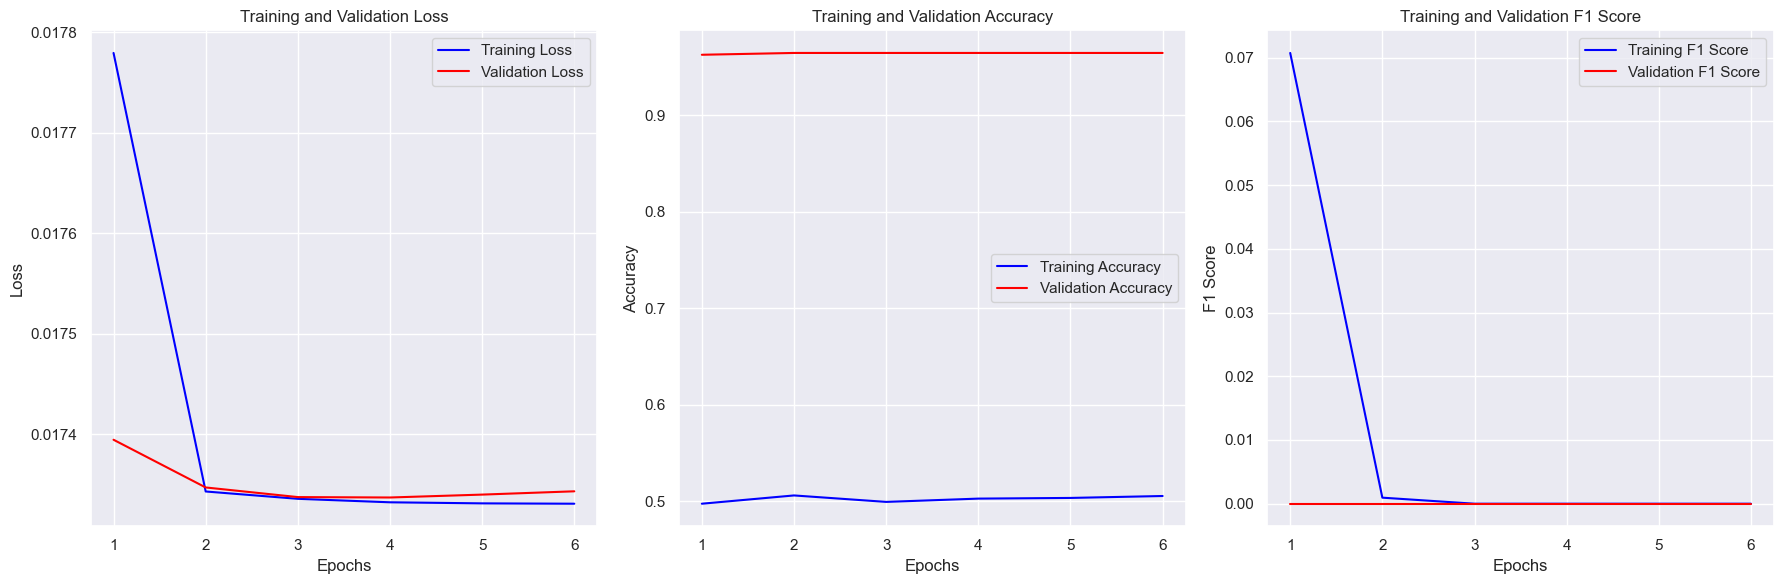

In [44]:
# Plotting the training progress
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(18, 6))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.plot(epochs, val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# F1 Score plot
plt.subplot(1, 3, 3)
plt.plot(epochs, train_f1s, label='Training F1 Score', color='blue')
plt.plot(epochs, val_f1s, label='Validation F1 Score', color='red')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

#### Load First Model

In [45]:
# Load the scripted model
# model = torch.jit.load('../Models/best_model.pth')
model = torch.jit.load('../Models/fullEpoch_model.pth')
model.to(device)
model.eval()

RecursiveScriptModule(
  original_name=DynamicANN
  (network): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
    (1): RecursiveScriptModule(original_name=ReLU)
    (2): RecursiveScriptModule(original_name=Dropout)
    (3): RecursiveScriptModule(original_name=Linear)
    (4): RecursiveScriptModule(original_name=ReLU)
    (5): RecursiveScriptModule(original_name=Dropout)
    (6): RecursiveScriptModule(original_name=Linear)
    (7): RecursiveScriptModule(original_name=ReLU)
    (8): RecursiveScriptModule(original_name=Dropout)
    (9): RecursiveScriptModule(original_name=Linear)
    (10): RecursiveScriptModule(original_name=Sigmoid)
  )
)

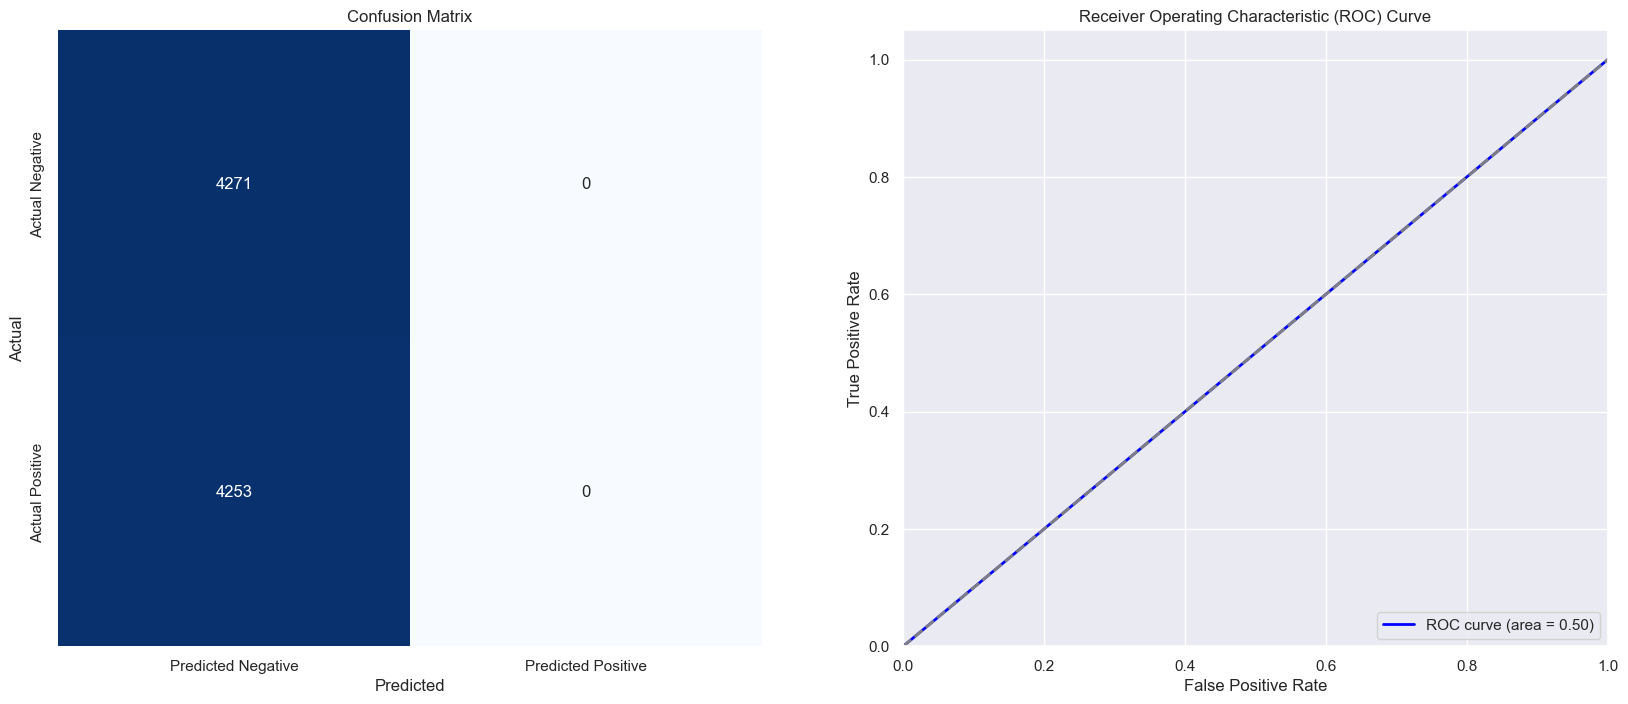

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,ANN: threshold = 0.25,6 Epochs,"ANN - BalancedDataLoader - All Features - hidden_layers = [64, 32, 16] & dropout_rate = 0.05 & use_batch_norm = False & L2: 1e-05 & FocalLoss(alpha=0.2, gamma=3, reduction=mean) & scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)",Training,0.501056,0.0,0.0,0.498944,1.0,1.0,0.5


In [46]:
# initialize variables
Algorithm = f'ANN: threshold = {threshold}'
Desc = f'ANN - BalancedDataLoader - All Features - hidden_layers = {hidden_layers} & dropout_rate = {dropout_rate} & use_batch_norm = {use_batch_norm} & L2: {weight_decay} \
        & FocalLoss(alpha={alphac}, gamma={gammac}, reduction={reductionc}) & scheduler = optim.lr_scheduler.StepLR(optimizer, step_size={step_size}, gamma={gammas})'
Model = f'{epoch+1} Epochs'
Type = 'Training'

# display
df_classification = ClassificationMatricANN(Algorithm, Model, Desc, Type, model, loader='train_loader')
df_classification

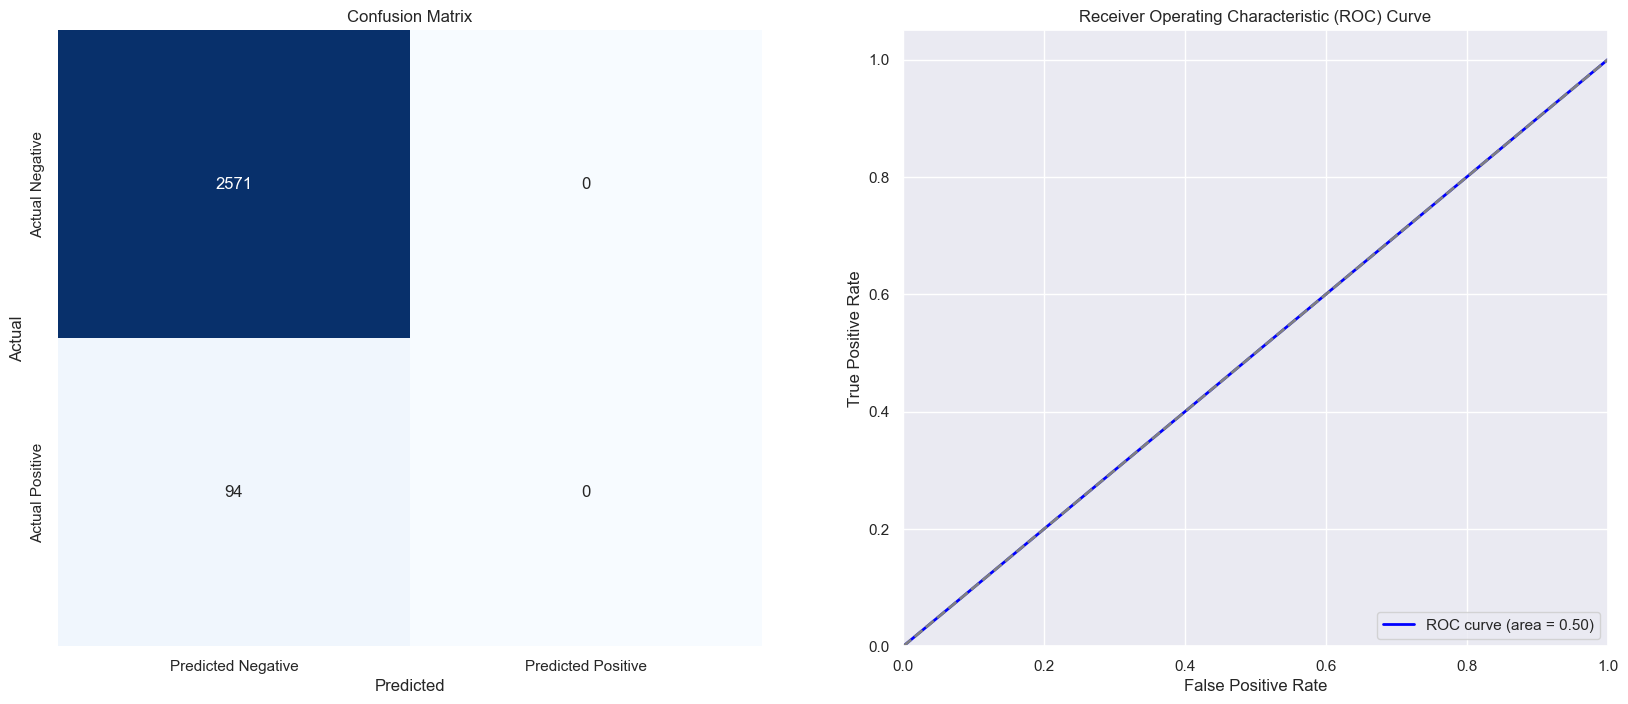

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,ANN: threshold = 0.25,6 Epochs,"ANN - BalancedDataLoader - All Features - hidden_layers = [64, 32, 16] & dropout_rate = 0.05 & use_batch_norm = False & L2: 1e-05 & FocalLoss(alpha=0.2, gamma=3, reduction=mean) & scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)",Training,0.501056,0.0,0.0,0.498944,1.0,1.0,0.5
1,ANN: threshold = 0.25,6 Epochs,"ANN - BalancedDataLoader - All Features - hidden_layers = [64, 32, 16] & dropout_rate = 0.05 & use_batch_norm = False & L2: 1e-05 & FocalLoss(alpha=0.2, gamma=3, reduction=mean) & scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)",Testing,0.964728,0.0,0.0,0.035272,1.0,1.0,0.5


In [47]:
# initialize variables
Algorithm = f'ANN: threshold = {threshold}'
Desc = f'ANN - BalancedDataLoader - All Features - hidden_layers = {hidden_layers} & dropout_rate = {dropout_rate} & use_batch_norm = {use_batch_norm} & L2: {weight_decay} \
        & FocalLoss(alpha={alphac}, gamma={gammac}, reduction={reductionc}) & scheduler = optim.lr_scheduler.StepLR(optimizer, step_size={step_size}, gamma={gammas})'
Model = f'{epoch+1} Epochs'
Type = 'Testing'

# display
df_classification = ClassificationMatricANN(Algorithm, Model, Desc, Type, model, 'test_loader', df_classification)
df_classification